In [44]:
import pandas as pd
#import all dependencies 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [45]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [39]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


In [40]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [41]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,...,0.408167,0.610804,NaN,0.453548,NaN,0.349513,0.355185,0.393451,0.351395,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,...,0.408167,0.701418,NaN,0.453548,NaN,0.349513,0.355185,0.393451,0.351395,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,...,0.408167,0.608512,NaN,0.453548,NaN,0.349513,0.355185,0.393451,0.351395,North America


#### Filter data set to only include countries that have data for all 3 years

In [42]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if lenght matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

#### Final Data sets

In [43]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region


# GINI,GDP and Happiness

In [20]:
#See the descriptive statistics 
gini_index_2010.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,2010.0,6.621728,9.768929,0.901594,66.900002,0.754189,-0.083949,0.773794,0.843097,0.213235,...,0.458500,0.477603,0.393193,0.259874,0.223304,0.264582,0.232543,0.179055,0.164521,0.158796
std,0.0,0.255493,0.111177,0.035644,0.565688,0.033844,0.048716,0.114412,0.004297,0.003196,...,0.019092,0.023896,0.037407,0.043731,0.066142,0.058024,0.087256,0.040874,0.013487,0.049122
min,2010.0,6.441067,9.690315,0.876390,66.500000,0.730258,-0.118397,0.692892,0.840059,0.210975,...,0.445000,0.460706,0.366742,0.228952,0.176535,0.223553,0.170844,0.150154,0.154984,0.124062
25%,2010.0,6.531398,9.729622,0.888992,66.700001,0.742224,-0.101173,0.733343,0.841578,0.212105,...,0.451750,0.469154,0.379967,0.244413,0.199919,0.244067,0.201693,0.164605,0.159752,0.141429
50%,2010.0,6.621728,9.768929,0.901594,66.900002,0.754189,-0.083949,0.773794,0.843097,0.213235,...,0.458500,0.477603,0.393193,0.259874,0.223304,0.264582,0.232543,0.179055,0.164521,0.158796
75%,2010.0,6.712058,9.808236,0.914196,67.100002,0.766155,-0.066726,0.814245,0.844616,0.214365,...,0.465250,0.486051,0.406418,0.275336,0.246689,0.285096,0.263393,0.193506,0.169289,0.176164
max,2010.0,6.802389,9.847543,0.926799,67.300003,0.778121,-0.049502,0.854695,0.846136,0.215495,...,0.472000,0.494500,0.419644,0.290797,0.270073,0.305611,0.294242,0.207957,0.174058,0.193531


In [21]:
# regimen_group = clean_data.groupby('Drug Regimen')
# count_mice_per_drug= regimen_group['Mouse ID'].count()


# #Generate Scatter plot and linear regression in 2010 
# fig,ax = plt.subplots(figsize=(12,6))
# x_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
# y_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
# #plt.annotate(line_eq,(6,10),fontsize=12,color="red")
# plt.xlabel("Life Ladder")
# plt.ylabel("GINI Index")
# plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# # #print the statistical values to see the relationship between the two variables
# # correlation = st.pearsonr(x_values,y_values)
# # print(f"The correlation coefficient is {round(correlation[0],2)}")
# print(f"Regression line equation is: {line_eq}")
# print(f"The r-squared is: {rvalue**2}")

# plt.show()


In [22]:
#Data set with the countries that have data for all 3 years 
Final_df

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Region
0,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,...,NaN,0.286599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
1,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,...,NaN,0.290681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
2,Afghanistan,2019,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,...,NaN,0.374930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
3,Albania,2017,4.639548,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,...,0.30325,0.410488,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN,Europe & Central Asia
4,Albania,2018,5.004403,9.417863,0.683592,68.699997,0.824212,0.008337,0.899129,0.713300,...,0.30325,0.456174,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Zambia,2018,4.041488,8.228971,0.717720,55.299999,0.790626,0.037525,0.810731,0.702698,...,0.52740,0.619443,NaN,NaN,NaN,NaN,NaN,0.110429,NaN,Sub-Saharan Africa
383,Zambia,2019,3.306797,8.224403,0.637894,55.799999,0.811040,0.066340,0.831956,0.743407,...,0.52740,0.556424,NaN,NaN,NaN,NaN,NaN,0.110429,NaN,Sub-Saharan Africa
384,Zimbabwe,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,...,0.43200,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Sub-Saharan Africa
385,Zimbabwe,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,...,0.43200,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Sub-Saharan Africa


In [23]:
# #drop all NaN values 
# cleaned_gini_df = gini_df.dropna(subset = ['2014', '2015'])
# # cleaned_gini.dtypes
# cleaned_gini_df.head()

# Understanding log GDP: log GDP is not simply a growth rate of GDP!!!

log GDP is the absolute value that converted from the actual number.
log formula = ln x = log e^x

Reasons why we're using log GDP instead of actual number. Long story to short: 
1. To make outliers not look like outliers (to make "bad" data to be well behaved). Though it's far from the median/mean values, it makes it easier to read.  
2. To simplify the numbers and their complexity of interaction terms. A logarithm makes all data to be positive which would make it easier to draw a graph and linearize a relationship 

# Anlyasis 1) The Relationship between log GDP and Happiness

### 2010

Regression line equation is: y = -2.3x + 29.07
The r-squared is: 1.0


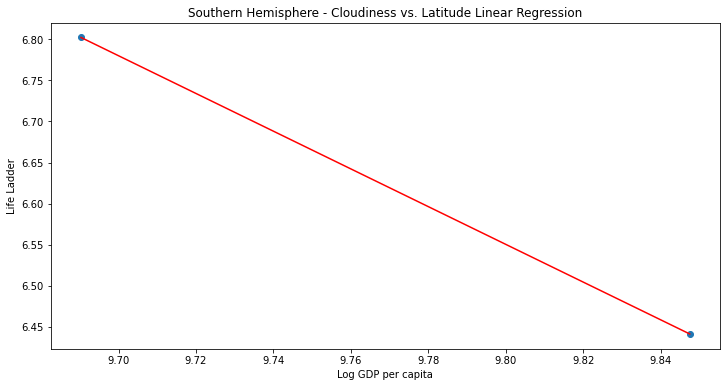

In [24]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()



### 2015 

ValueError: Inputs must not be empty.

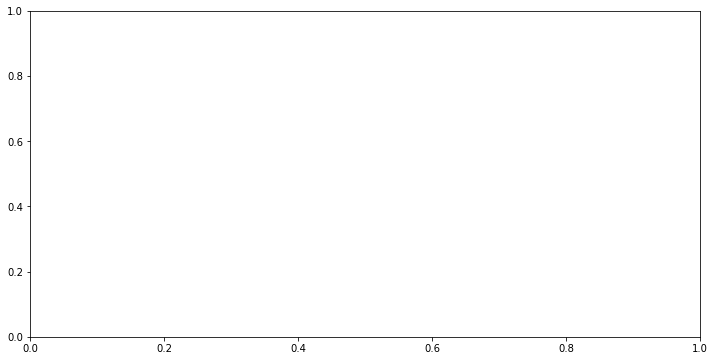

In [25]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2015['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

# Analysis 2) The Relationship between GINI Indx and Happiness

### 2010

Regression line equation is: y = 13.38x + 0.49
The r-squared is: 1.0


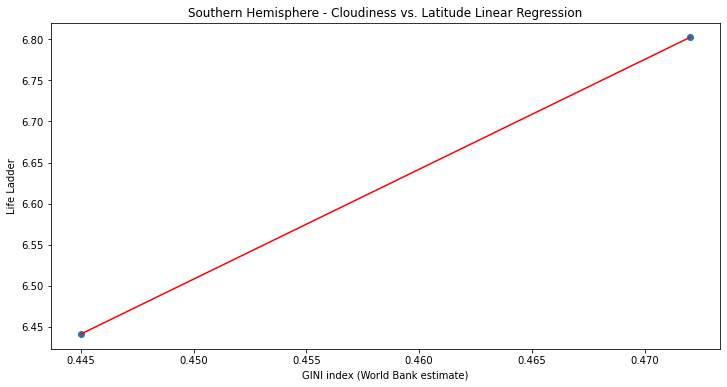

In [26]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
y_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI index (World Bank estimate)")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


### 2015

ValueError: Inputs must not be empty.

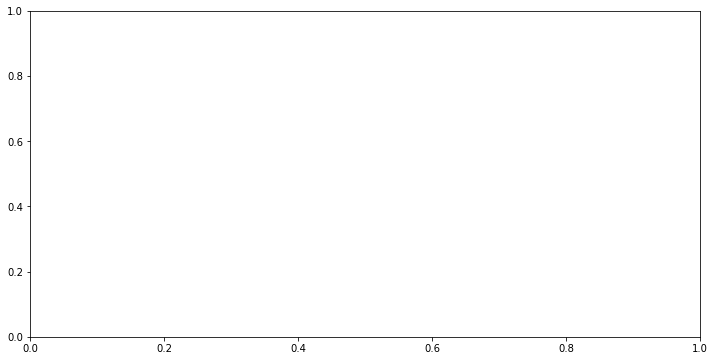

In [27]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['GINI index (World Bank estimate)']).astype(float)
y_values = pd.to_numeric(gini_index_2015['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI index (World Bank estimate)")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


# Analysis 3) The Relationship between GINI Index and GDP

### 2010 

Regression line equation is: y = -0.17x + 2.14
The r-squared is: 1.0


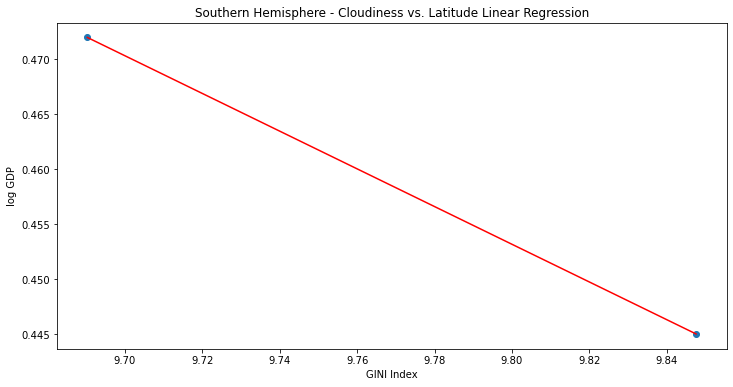

In [28]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI Index")
plt.ylabel("log GDP")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

### 2015 

ValueError: Inputs must not be empty.

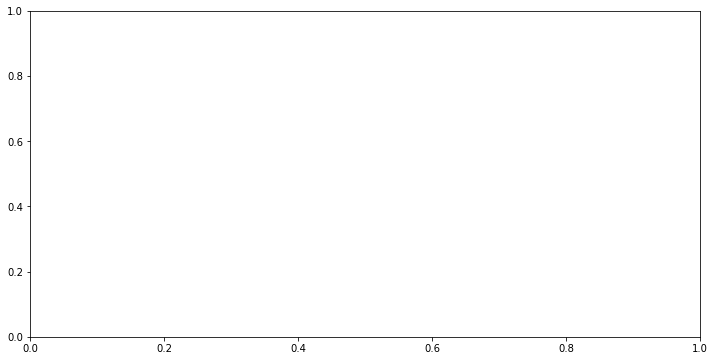

In [29]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2015['GINI index (World Bank estimate)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI Index")
plt.ylabel("log GDP")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
# x_values = pd.to_numeric(merged_gini_df['Life Ladder']).astype(float)
# y_values = pd.to_numeric(merged_gini_df['Growth Rate']).astype(float)

# Anaylysis 4) Each group's relationship with Happiness 

Grouped into 4 then see the difference. 

group1) low GINI & low log GDP - 4.8/

group2) low GINI & high log GDP - 6.5/

group3) high GINI & low log GDP - 4.7 /

group4) high GINI & high log GDP - 5.7 

group 2 has shown the highest happiness score while group 1 and 3 show similar score. 
This data would indicate that how much you earn is more relevant to your happiness than the degree of economic inequality. 

- Draw a bar/scatter plots to visualize this data. 

In [33]:
#Divde into 4 groups to see the relationship with happiness/ used 'mean' values for both indicators
group_1 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_2 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] >= 9.27), :]
group_3 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_4 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] > 9.27), :]
group_1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
180,Egypt,2015,4.762538,9.234304,0.729744,60.799999,0.659261,-0.093785,0.684498,0.609594,-1.343533,-0.711105,2.184174,0.458616,0.318,Middle East & North Africa
342,Kyrgyzstan,2015,4.905376,8.081330,0.856585,63.200001,0.813176,0.222086,0.857725,0.766794,-0.643299,-0.889031,1.843325,0.375777,0.290,Europe & Central Asia
410,Moldova,2015,6.017472,8.647454,0.839906,62.900002,0.595241,-0.053763,0.943119,0.590383,-0.149424,-0.496424,1.693320,0.281400,0.270,Europe & Central Asia
453,Pakistan,2015,4.823195,8.402713,0.561720,57.299999,0.586546,0.076070,0.716641,0.575255,-1.602387,-0.717988,2.022385,0.419304,0.335,South Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia


In [34]:
group_2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
130,Croatia,2015,5.205438,9.953512,0.768363,68.400002,0.693523,-0.094134,0.848546,0.608886,0.573118,0.330863,1.785050,0.342920,0.311,Europe & Central Asia
145,Czech Republic,2015,6.608017,10.328933,0.911363,68.800003,0.808484,-0.142858,0.886467,0.750774,1.010975,0.931798,1.802234,0.272734,0.259,Europe & Central Asia
154,Denmark,2015,7.514425,10.731777,0.959701,71.500000,0.941436,0.223100,0.191016,0.829217,1.225238,1.958987,1.618308,0.215360,0.282,Europe & Central Asia
201,Estonia,2015,5.628909,10.225942,0.917930,68.000000,0.814692,-0.163718,0.568734,0.723338,0.903892,1.340644,1.893060,0.336310,0.327,Europe & Central Asia
210,Finland,2015,7.447926,10.573466,0.947801,71.599998,0.929862,0.112200,0.223370,0.751316,1.292087,1.996956,1.573618,0.211283,0.271,Europe & Central Asia
219,France,2015,6.357625,10.541011,0.895719,73.199997,0.817036,-0.138424,0.640602,0.785966,0.656673,1.321365,1.847276,0.290561,0.327,Europe & Central Asia
238,Germany,2015,7.037138,10.692925,0.925923,71.300003,0.889429,0.178984,0.412168,0.764539,1.060911,1.773198,1.648845,0.234306,0.317,Europe & Central Asia


In [30]:
group_3

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
67,Bolivia,2015,5.834329,8.770963,0.828706,62.700001,0.883625,-0.021084,0.862374,0.785768,-0.136578,-0.843813,1.857556,0.318384,0.467,Latin America & Caribbean
190,El Salvador,2015,6.018496,8.850637,0.790755,65.199997,0.733356,-0.152128,0.804544,0.825734,0.067696,-0.262001,2.579119,0.428532,0.406,Latin America & Caribbean
202,Ethiopia,2015,4.573155,7.325462,0.625597,57.000000,0.802643,0.119070,0.567027,0.713888,-1.398272,-0.659277,1.865662,0.407960,0.350,Sub-Saharan Africa
230,Georgia,2015,4.121941,9.105573,0.517372,65.099998,0.639945,-0.188097,0.502417,0.547280,-0.095747,0.569531,2.048507,0.496976,0.365,Europe & Central Asia
262,Honduras,2015,4.845437,8.354058,0.772376,66.599998,0.534058,-0.087559,0.848083,0.862837,-0.445333,-0.677459,3.067590,0.633088,0.496,Latin America & Caribbean
287,Indonesia,2015,5.042800,9.245594,0.809478,61.500000,0.779418,0.462385,0.945967,0.876233,-0.215101,-0.334661,2.067515,0.409993,0.397,East Asia & Pacific
318,Ivory Coast,2015,4.445039,8.078747,0.703992,47.700001,0.799745,-0.036908,0.744250,0.663882,-0.619915,-0.563580,2.208616,0.496872,0.415,Sub-Saharan Africa
332,Kenya,2015,4.357618,7.936611,0.776923,58.299999,0.792990,0.237204,0.852550,0.702257,-0.695204,-0.528827,2.104910,0.483041,0.408,Sub-Saharan Africa
428,Myanmar,2015,4.223846,8.523228,0.752064,58.099998,0.807971,0.669303,0.633305,0.865906,-1.192024,-1.133447,1.620931,0.383757,0.381,East Asia & Pacific


In [27]:
group_4

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
72,Botswana,2015,3.761965,9.658858,0.815656,56.799999,0.857169,-0.119637,0.860293,0.746204,0.741217,0.597275,2.291609,0.609152,0.533,Sub-Saharan Africa
79,Brazil,2015,6.546897,9.602870,0.906693,65.800003,0.798935,-0.022317,0.771339,0.755194,0.063697,-0.230077,2.257859,0.344875,0.513,Latin America & Caribbean
98,Chile,2015,6.532750,10.010426,0.827142,69.599998,0.768881,0.036379,0.811511,0.803025,0.718964,1.263847,1.938147,0.296682,0.477,Latin America & Caribbean
107,Colombia,2015,6.387572,9.481480,0.889900,66.800003,0.790898,-0.102062,0.842899,0.839295,-0.532610,-0.034323,2.246151,0.351644,0.511,Latin America & Caribbean
121,Costa Rica,2015,6.854004,9.589951,0.878273,70.699997,0.906926,-0.052060,0.761419,0.849710,0.916802,0.538637,2.263607,0.330260,0.484,Latin America & Caribbean
138,Cyprus,2015,5.439161,10.331148,0.769556,73.099998,0.628035,0.113012,0.892795,0.746730,0.791225,1.039575,2.402444,0.441694,0.340,Europe & Central Asia
164,Dominican Republic,2015,5.061862,9.526418,0.893198,64.900002,0.856025,-0.065321,0.755288,0.713908,0.195487,-0.431556,2.927932,0.578430,0.452,Latin America & Caribbean
175,Ecuador,2015,5.964075,9.278399,0.855889,67.599998,0.800870,-0.113916,0.665828,0.850546,-0.177855,-0.824964,2.470919,0.414301,0.460,Latin America & Caribbean
248,Greece,2015,5.622519,10.091405,0.834825,71.800003,0.531736,-0.268624,0.823960,0.739751,0.210646,0.214054,2.209591,0.392990,0.360,Europe & Central Asia
292,Iran,2015,4.749956,9.722172,0.572407,65.099998,0.780383,0.148760,0.698951,0.644849,-1.219647,-0.762139,2.522234,0.531002,0.395,Middle East & North Africa


In [24]:
print(group_1['Life Ladder'].mean())
print(group_2['Life Ladder'].mean())
print(group_3['Life Ladder'].mean())
print(group_4['Life Ladder'].mean())

4.803574005666667
6.511840661416667
4.740749359214286
5.78066240830769


In [25]:
#cleaned_gini_df.count()

In [26]:
#Subtract from the GINI values in 2015 to the values in 2014 to see the difference
# cleaned_gini_df["Growth Rate"] = cleaned_gini_df["2015"] - cleaned_gini_df["2014"]
# # cleaned_gini_df =cleaned_gini_df.reset_index(drop=True)
# cleaned_gini_df.head()

In [ ]:
#Store country name and log gdp in a new dataframe
# gdp_log = gini_index_2015[["Country name", "Log GDP per capita","Life Ladder"]]
# gdp_log = gdp_log.rename(columns={"Country name":"Country Name"})
# gdp_log
# #merge new dataframe with gini_data
# merged_gini_df = pd.merge(cleaned_gini_df, gdp_log, on=["Country Name"])
# merged_gini_df

In [62]:
#Divide two groups by GINI index 
# gini_grouped = gini_index_2010.groupby('GINI index (World Bank estimate)') 
# type(gini_grouped)
# northern_hemisphere = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) > 0, :]
# southern_hemisphere = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) < 0, :]
#gini_grouped = gini_index_2010.groupby('GINI index (World Bank estimate)') 

#high_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) >= 0.33,:]
#low_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) < 0.33,:]

# high_gini = []
# low_gini = []

# for gini in gini_grouped:    
#     gini_data = gini_index_2010.loc[gini_index_2010["GINI index (World Bank estimate)"].astype(float) >= 0.33]
#     high_gini.append(gini_data)
    
# else:
#     low_gini.append(gini_data)
#     print(high_gini)
#     quartiles = gini_data.quantile([0.25, 0.5, 0.75])
#     first_quartile = quartiles[0.25]
#     third_quartile = quartiles[0.75]
#     iqr = third_quartile - first_quartile 
# pass    
#     lower_bound = first_quartile - (1.5*iqr)
#     upper_bound = third_quartile + (1.5*iqr)
    #print(f"The first quartile is {first_quartile}")
#     print(f"The third quartile of {treatment} is {third_quartile}")
#     print(f"The iqr value is {iqr}")
#     print(f"The median value is {quartiles[.5]}")
#     print(f"The outliers would be below {lower_bound}")
#     print(f"The outliers would be above {upper_bound}")
#     print("---------------------------------------------------------- \n")
    # Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# tumor_vol_data_list = []

# for treatment in treatment_list: 
#     tumor_vol_data = merge_drug.loc[merge_drug["Drug Regimen"] == treatment,'Tumor Volume (mm3)']   
#     #print(tumor_vol_data)
   
#     tumor_vol_data_list.append(tumor_vol_data)
#     #print(tumor_vol_data_list)

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
#     first_quartile = quartiles[0.25]
#     third_quartile = quartiles[0.75]
#     iqr = third_quartile - first_quartile 
#     # Determine outliers using upper and lower bounds
#     lower_bound = first_quartile - (1.5*iqr)
#     upper_bound = third_quartile + (1.5*iqr)
#     print(f"The first quartile of {treatment} is {first_quartile}")
#     print(f"The third quartile of {treatment} is {third_quartile}")
#     print(f"The iqr value of {treatment} is {iqr}")
#     print(f"The median value of {treatment} is {quartiles[.5]}")
#     print(f"The outliers of {treatment} would be below {lower_bound}")
#     print(f"The outliers of {treatment} would be above {upper_bound}")
#     print("---------------------------------------------------------- \n")
# # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Find a mouse treated with Capomulin 
# high_GINI = gini_index_2010.loc[gini_index_2010["GINI index (World Bank estimate)"].astype(float) >= 0.33,:]
# low_GINI = gini_index_2010.loc[gini_index_2010["GINI index (World Bank estimate)"].astype(float) < 0.33,:]

# fig2, ax2 = plt. subplots()
# plt.scatter(high_GINI, gini_index_2010['Life Ladder'])
# plt.title ("Mouse Weight vs. Avg. Tumor Volume in responds to Capomulin")
# plt.xlabel ('Weight (g)')
# plt.ylabel ('Average Tumor Volume (mm3)')


# plotdata = pd.DataFrame(
#     {"GINI Index": [high_GINI, low_GINI]}, 
#     index=["Life Ladder"])
# # Plot a bar chart
# plotdata.plot(kind="bar")

#gini_index_2010.plot.bar(x = "GINI index (World Bank estimate)", y = "Life Ladder", alpha = 0.5, align="center")
#df[cat] = le.fit_transform(df[cat].astype(str))
# plt.bar(high_GINI, users, color='r', alpha=0.5, align="center")
# bar_chart_pandas = count_mice_per_drug.plot(kind='bar',color='g', title = 'Number of Mice for Each Treatment',figsize=(10,5), rot=45)
# bar_chart_pandas.set_xlabel("Drug Regimen")
# bar_chart_pandas.set_ylabel("Number of Mice")



# df.plot.bar(x = 'Name', y = ['Events1', 'Events2'], rot = 40)

# plt.show()
# plt.tight_layout()

# high_GINI = gini_grouped[gini_grouped['GINI index (World Bank estimate)'] >= 0.3]
# low_GINI = gini_grouped[gini_grouped['GINI index(World Bank estimate)'] <0.3]
#df1 = df[df['Sales'] >= s]

In [ ]:
#count merged gini
# merged_gini_df.count()

In [ ]:
#Select data for 2014 and 2015 to bring in. 
# fields = ['Country Name','2014', '2015']
# gini_df = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_1993647.csv", skipinitialspace=True, usecols=fields)
# # See the keys
# gini_df.keys()
# # See contents 
# gini_df[['Country Name','2014', '2015']]

In [38]:
#high_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) >= 0.33,:]
#type(high_GINI)
#high_GINI_df = pd.Dataframe
#low_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) < 0.33,:]
# df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
# plt.show()

# ones = []
# for range(len(data)):
#     ones.append(1)
